# Исследование объявлений о продаже квартир

**Моя задача** - установить параметры для определения рыночной стоимости объекта недвижимости, т.е. <span style = "color:blue">выявить корреляцию между стоимостью и другими характеристиками квартиры</span>.

**План работ:**
1. Изучить данные в файле.
2. Обработать пропуски и дубликаты в данных.
3. Добавить в таблицу дополнительные расчетные данные.
4. Исследовать полученный результат.
5. Выявить необходимые корреляции.

## Изучение данных из файла

In [1]:
# Загружу необхожимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t') # Читаю файл с данными и сохраняем в датафрейм df

In [3]:
df.info() # Смотрю общее инфо по файлу
display(df.head(10))
display(df.describe())
print('Явных дубликатов: ', df.duplicated().sum()) # Смотрю есть ли явные дубликаты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Явных дубликатов:  0


In [4]:
df.duplicated().sum()

0

### Вывод
В таблице много пропущенных данных, а также есть вопросы по типам данных. Например, ```first_day_exposition``` нужно сразу поменять на тип datetime, чтобы с ней можно было работать. А вот у столбца ```is_apartment``` тип данных строка из-за большого числа отсутствующих значений. Этот столбец пока не трогаю, т.к. если изменить тип данных, то все пустые значения станут ***True***, что сделает данные куда менее объективными. Оставлю его пока в покое.
Некоторые столбцы можно было изменить с float на int, например, балконы или всего этажей, потому что не бывает 2,5 балконов или 14,2 этажа в доме, но пока это не мешает.
Еще поправлю заголовки таблицы для единого стиля.

## Предобработка данных

In [5]:
# Сначала поправлю названия столбцов
df = df.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000':'parks_around_3000',
    'ponds_around3000':'ponds_around_3000'}
              )

In [6]:
# Меняю тип first_day_exposition со строки в datetime

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info() # Проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Теперь разберусь с пропущенными значениями, где это возможно и важно.

In [7]:
# Выведу число пропусков и кол-во различных значений по столбцам

for column in df.columns:
    if df[column].isna().sum() > 0:
        print(f'В столбце {column} пропущено значений: {df[column].isna().sum()}')
        display(df[column].value_counts())
        print('*'*50)

В столбце ceiling_height пропущено значений: 9195


2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

**************************************************
В столбце floors_total пропущено значений: 86


5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

**************************************************
В столбце living_area пропущено значений: 1903


18.00     882
17.00     675
30.00     598
16.00     486
20.00     481
         ... 
76.70       1
39.41       1
124.90      1
36.07       1
42.55       1
Name: living_area, Length: 1782, dtype: int64

**************************************************
В столбце is_apartment пропущено значений: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

**************************************************
В столбце kitchen_area пропущено значений: 2278


6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
53.10       1
12.56       1
11.84       1
13.27       1
13.83       1
Name: kitchen_area, Length: 971, dtype: int64

**************************************************
В столбце balcony пропущено значений: 11519


1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

**************************************************
В столбце locality_name пропущено значений: 49


Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

**************************************************
В столбце airports_nearest пропущено значений: 5542


37434.0    61
21928.0    32
44870.0    30
39946.0    30
18732.0    27
           ..
32366.0     1
13024.0     1
52394.0     1
20007.0     1
24665.0     1
Name: airports_nearest, Length: 8275, dtype: int64

**************************************************
В столбце city_centers_nearest пропущено значений: 5519


8460.0     61
20802.0    32
10720.0    30
20444.0    27
8434.0     27
           ..
16631.0     1
24311.0     1
15782.0     1
11940.0     1
6263.0      1
Name: city_centers_nearest, Length: 7642, dtype: int64

**************************************************
В столбце parks_around_3000 пропущено значений: 5518


0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around_3000, dtype: int64

**************************************************
В столбце parks_nearest пропущено значений: 15620


441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
3.0        1
2847.0     1
1443.0     1
7.0        1
2984.0     1
Name: parks_nearest, Length: 995, dtype: int64

**************************************************
В столбце ponds_around_3000 пропущено значений: 5518


0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around_3000, dtype: int64

**************************************************
В столбце ponds_nearest пропущено значений: 14589


427.0     70
454.0     41
153.0     40
433.0     39
474.0     37
          ..
150.0      1
967.0      1
131.0      1
1164.0     1
1134.0     1
Name: ponds_nearest, Length: 1096, dtype: int64

**************************************************
В столбце days_exposition пропущено значений: 3181


45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

**************************************************


Незначительное число пропусков, с которыми можно распрощаться, в столбцах ```locality_name``` и ```floors_total```. Просто уберу строки с пропущенными значениями, это сильно не повлияет на дальнейший анализ.

In [8]:
df = df.dropna(subset=['locality_name', 'floors_total'])
df.info() # Проверка результата

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

***Теперь заполню пропуски.*** 
- В столбце ```ceiling_height``` пропущено значений: 9195.
- В столбце ```living_area``` пропущено значений: 1903.
- В столбце ```is_apartment``` пропущено значений: 20924.
- В столбце ```kitchen_area``` пропущено значений: 2278.
- В столбце ```balcony``` пропущено значений: 11519.
- В столбце ```airports_nearest``` пропущено значений: 5542.
- В столбце ```city_centers_nearest``` пропущено значений: 5519.
- В столбце ```parks_around_3000``` пропущено значений: 5518.
- В столбце ```parks_nearest``` пропущено значений: 15620.
- В столбце ```ponds_around_3000``` пропущено значений: 5518.
- В столбце ```ponds_nearest``` пропущено значений: 14589.
- В столбце ```days_exposition``` пропущено значений: 3181.

### Разберусь с высотой потолков

In [9]:
# Изучаю высоту потолков
display(df['ceiling_height'].describe())
display(
    df.query('ceiling_height <= 2 or ceiling_height > 6')['ceiling_height'].value_counts()
) # Смотрю кол-во крайне малых и крайне выскоих значений
print('Число пропусков в столбце', df['ceiling_height'].isna().sum()) # Количество пропуков

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

2.00      11
27.00      8
25.00      7
8.00       3
32.00      2
20.00      1
1.00       1
10.30      1
27.50      1
22.60      1
8.30       1
1.75       1
14.00      1
1.20       1
26.00      1
24.00      1
100.00     1
Name: ceiling_height, dtype: int64

Число пропусков в столбце 9084


Видим странные значения: или слишком малые (менее 2м) или слишком большие (более 6м). Моя гипотеза такова: высоту в 20+ и 30+ метров указали ошибочно, неверно указав разделение порядков чисел, т.е. в действительности там 2+ и 3+ метра, что вполне может быть. А остальные значения при любых манипуляциях окажутся либо слишком малыми либо слишком большими. Тут устанавливаю правило.

***Правило***
Высота потолков в квартирах может быть от 2.4 до 4 метров.

Исправлю данные согласно правилу: часть скорректирую, другую часть удалю.
Создам копию датарфейма, чтобы работать с ним, а сырые данные оставлю для сравнения (может пригодиться).
Пропущенные значения заполню средними по столбцу.

In [10]:
df_new = df.copy()
df_new['ceiling_height'] = df_new['ceiling_height'].fillna(df_new['ceiling_height'].mean()) # Заполняю пропуски средними значениями
df_new['ceiling_height'].apply(lambda x: x/10 if (x > 24) else None) # Меняю значения у 20 и 30 метровых потолков
df_new = df_new.query('ceiling_height >= 2.4 and ceiling_height <= 4') # Оставляю строки, где высота потолков от 2.4 до 4 метров
display(df_new['ceiling_height'].describe()) # Проверка
print('Число пропусков в столбце:', df_new['ceiling_height'].isna().sum())

count    23469.000000
mean         2.740749
std          0.202761
min          2.400000
25%          2.600000
50%          2.771283
75%          2.771283
max          4.000000
Name: ceiling_height, dtype: float64

Число пропусков в столбце: 0


### Изучу значения в ```living_area```.

In [11]:
display(df_new['living_area'].describe())
print('Число квартир с маленькой жилой площадью', df_new[df_new['living_area'] < 12]['living_area'].count()) # Число квартир с маленькой жилой площадью
print('Число квартир с большой жилой площадью', df_new[df_new['living_area'] > 200]['living_area'].count())
print('Число пропусков в столбце', df_new['living_area'].isna().sum()) # Число пропусков в столбце

count    21613.000000
mean        34.352410
std         21.669848
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

Число квартир с маленькой жилой площадью 128
Число квартир с большой жилой площадью 28
Число пропусков в столбце 1856


Минимальная жилая площадь составляет всего 2 кв.м. Как минимум странно. При этом квартир с жилой площадью менее 12 метров всего 128. Введу еще одно правило.   

***Правило***   
Жилую площадь в квартире менее 12 квадратных метров считать крайне малой.   

Это или ошибка или выброс. От строк с крайне малой жилой площадью избавлюсь.
Максимальное значение - почти 410 метров. Квартиры бывают такими большими. Тем не менее выкину квартиры с жилой площадью более 200 метров, потому что это уже совсем другой класс недвижимости, цены на который зависят от большего числа параметров. Опять же, возможны ошибки при вводе данных.

0.5561161239876843
count    21422.000000
mean        34.218005
std         19.878945
min         12.080000
25%         18.800000
50%         30.000000
75%         42.300000
max        199.000000
Name: living_area, dtype: float64


<AxesSubplot:>

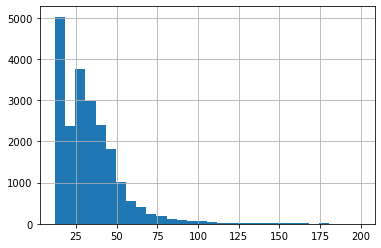

In [12]:
print(df_new['last_price'].corr(df_new['living_area'])) # Проверим корреляцию между стоимостью и жилой площадью
df_new = df_new.query('living_area > 12') # Выбираю только строки с жилой площадью более 12 метров
df_new = df_new.query('living_area < 200') # Выбираю только строки с жилой площадью менее 200 метров
print(df_new['living_area'].describe())
df_new['living_area'].hist(bins=30)

### is_apartment
В столбце ```is_apartment``` очень много пропусков. При этом нельзя заменить значения, т.к. не понять по косвенным признакам является ли площадь апартаментами или нет. Запомню и передам разработчикам. Скорее всего это поле для ввода не является обязательным и пользователи его просто пропускают.

### Разберусь с площадью кухонь.

count    20662.000000
mean        10.427518
std          5.624183
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        107.000000
Name: kitchen_area, dtype: float64
Кол-во кухонь менее 4 метров: 26
Кол-во кухонь более 40 метров: 103
Пропущенных значений: 760


<AxesSubplot:>

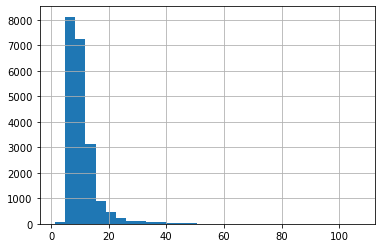

In [13]:
print(df_new['kitchen_area'].describe())
print('Кол-во кухонь менее 4 метров:', df_new[df_new['kitchen_area'] < 4]['kitchen_area'].count()) # Число кухонь менее 4 метров
print('Кол-во кухонь более 40 метров:', df_new[df_new['kitchen_area'] > 40]['kitchen_area'].count()) # Число кухонь более 40 метров
print('Пропущенных значений:', df_new['kitchen_area'].isna().sum())
df_new['kitchen_area'].hist(bins=30)

Что можно делать на кухне менее 4 метров? Тоже считаю, что ничего. Избавимся от этих строк.   
Большое число кухонь более 18 метров. Предположу, что пользователи имели ввиду, что это кухня-гостинная - это вполне возможно. Но кухни более 50 метров вероятнее всего просто ошибка ввода. Проверю такие по общей площади и стоимости. 

In [14]:
display(df_new.query('kitchen_area > 40 and total_area < 70')) # Смотрю на размеры кухонь и общую площадь

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
511,7,5950000.0,69.0,2017-12-21,1,2.771283,16.0,13.0,12,NaN,...,50.0,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,56.0


Наиболее вероятно, что кухни с огромной площадью - это все же кухни-гостинные, т.к. не нашлось небольших квартир с большими кухнями. Ошибок нет.
760 пропущенных значений достаточно много, чтобы просто от них избавляться. Поэтому сгруппирую квартиры по площади и заполню площади кухонь средним по группе.

count    21422.000000
mean        59.603028
std         31.147928
min         16.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        413.500000
Name: total_area, dtype: float64


<AxesSubplot:>

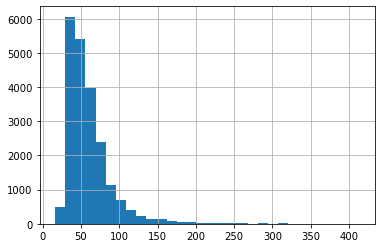

In [15]:
print(df_new['total_area'].describe())
df_new['total_area'].hist(bins=30)

Ориентируясь на распределение общих площадей, создам 4 группы квартир по площади:
- до 40м - маленькие
- от 40м до 60м - средние
- от 60м до 90м - большие
- более 90м - очень большие

In [16]:
def area_group(area):
    '''
    Возвращает категорию квартиры по площади:
    до 40м - small (s)
    40-60м - medium (m)
    60-90м - large (l)
    более 90м - extra large (xl)
    '''
    if 0 <= area <= 40:
        return 's'
    if 41 <= area <= 60:
        return 'm'
    if 61 <= area <= 90:
        return 'l'
    return 'xl'

# Применю функцию для создания нового столбца с категорией
df_new['area_group'] = df_new['total_area'].apply(area_group)
df_new.head() # Проверка

df_new_grouped = df_new.groupby('area_group')
df_new['kitchen_area'] = df_new_grouped.kitchen_area.apply(lambda x: x.fillna(x.mean())) # Заполняю пропуски средним по группам

df_new = df_new.query('kitchen_area > 4') # Избавляемся от маленьких кухонь
df_new.info() # Проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21372 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21372 non-null  int64         
 1   last_price            21372 non-null  float64       
 2   total_area            21372 non-null  float64       
 3   first_day_exposition  21372 non-null  datetime64[ns]
 4   rooms                 21372 non-null  int64         
 5   ceiling_height        21372 non-null  float64       
 6   floors_total          21372 non-null  float64       
 7   living_area           21372 non-null  float64       
 8   floor                 21372 non-null  int64         
 9   is_apartment          2604 non-null   object        
 10  studio                21372 non-null  bool          
 11  open_plan             21372 non-null  bool          
 12  kitchen_area          21372 non-null  float64       
 13  balcony         

### Балконы
Осталось разобраться с балконами

In [17]:
print(df_new['balcony'].value_counts()) # Выведу значения по балконам
print('Число пропусков в столбце:', df_new['balcony'].isna().sum())

1.0    3998
0.0    3467
2.0    3456
5.0     278
4.0     174
3.0      74
Name: balcony, dtype: int64
Число пропусков в столбце: 9925


Никогда не видел квартиры с более чем 2 балконами. Ну да ладно. Итак, в таблице почти половина квартир с пропущенными данными по балконам. Т.к. данные заполняют пользователи, велика вероятность, что вместо этих пропусков должны быть 0, т.е. балконов просто нет.
Заполню пропуки нулями.

In [18]:
df_new.loc[:, 'balcony'] = df_new.loc[:, 'balcony'].fillna(0)
print('Число пропусков в столбце:', df_new['balcony'].isna().sum()) # Проверка

Число пропусков в столбце: 0


/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/1178775018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[:, 'balcony'] = df_new.loc[:, 'balcony'].fillna(0)


### Срок хранения объявления
Посмотрю поближе на параметр ```days_exposition```.

In [19]:
df_new['days_exposition'].describe()

count    18439.000000
mean       184.850317
std        221.715016
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

В столбце нет значения 0 и нет дробных значений. Это может указывать на то, что пропуски значений у тех объявлений, которые висели менее суток. Заполню пропуски.

In [20]:
df_new.loc[:, 'days_exposition'] = df_new.loc[:, 'days_exposition'].fillna(0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21372 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21372 non-null  int64         
 1   last_price            21372 non-null  float64       
 2   total_area            21372 non-null  float64       
 3   first_day_exposition  21372 non-null  datetime64[ns]
 4   rooms                 21372 non-null  int64         
 5   ceiling_height        21372 non-null  float64       
 6   floors_total          21372 non-null  float64       
 7   living_area           21372 non-null  float64       
 8   floor                 21372 non-null  int64         
 9   is_apartment          2604 non-null   object        
 10  studio                21372 non-null  bool          
 11  open_plan             21372 non-null  bool          
 12  kitchen_area          21372 non-null  float64       
 13  balcony         

/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/1206019529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[:, 'days_exposition'] = df_new.loc[:, 'days_exposition'].fillna(0)


### Геоданные
Последним этапом в подготовке данных будут геоданные таблицы: названия населенных пунктов, удаленность от центра, аэропортов, наличие парков и прудов.

In [21]:
display(df_new['locality_name'].value_counts().head(50))

Санкт-Петербург                            14316
посёлок Мурино                               450
посёлок Шушары                               393
Всеволожск                                   368
Пушкин                                       341
Колпино                                      328
посёлок Парголово                            291
Гатчина                                      291
деревня Кудрово                              256
Петергоф                                     196
Выборг                                       187
Красное Село                                 166
Сестрорецк                                   165
Кудрово                                      158
деревня Новое Девяткино                      136
Сертолово                                    134
Ломоносов                                    128
Сланцы                                       100
Тосно                                         94
Волхов                                        91
Кириши              

Что ж, есть в значениях различные написания одних  и тех же населенных пунктов. Немного. Поправим.

In [22]:
def locality(name):
    if 'Мурино' in name:
        return 'Мурино'
    if 'Шушары' in name:
        return 'Шушары'
    if 'Кудрово' in name:
        return 'Кудрово'
    if 'Колпино' in name:
        return 'Колпино'
    if 'Парголово' in name:
        return 'Парголово'
    return name
        
df_new['locality_name'] = df_new['locality_name'].apply(locality)
display(df_new['locality_name'].value_counts().head(50))

/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/3428472966.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['locality_name'] = df_new['locality_name'].apply(locality)


Санкт-Петербург                            14316
Мурино                                       509
Кудрово                                      414
Шушары                                       393
Всеволожск                                   368
Пушкин                                       341
Колпино                                      328
Парголово                                    291
Гатчина                                      291
Петергоф                                     196
Выборг                                       187
Красное Село                                 166
Сестрорецк                                   165
деревня Новое Девяткино                      136
Сертолово                                    134
Ломоносов                                    128
Сланцы                                       100
Тосно                                         94
Волхов                                        91
Кириши                                        90
Кронштадт           

В столбцах с кол-вом парков и прудов одинаковое кол-во значений. Посмотрим в одних и тех же ли строках.

<AxesSubplot:>

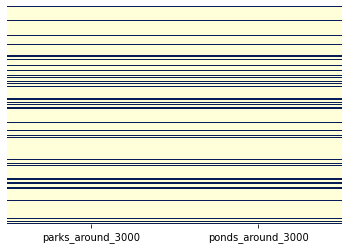

In [23]:
sns.heatmap(df_new[['parks_around_3000', 'ponds_around_3000']].isna(), yticklabels=False, cbar=False, cmap="YlGnBu")

Действительно в одних и тех же строках пользователи не ввели кол-во парков и прудов в радиусе 3км. Скорее всего это так же указывает на отсутствие рядом этих объектов. В городской черте это не редкость. Заполню пропуски нулями.

In [24]:
df_new[['parks_around_3000', 'ponds_around_3000']] = df_new[['parks_around_3000', 'ponds_around_3000']].fillna(0)
df_new.info() # Проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21372 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21372 non-null  int64         
 1   last_price            21372 non-null  float64       
 2   total_area            21372 non-null  float64       
 3   first_day_exposition  21372 non-null  datetime64[ns]
 4   rooms                 21372 non-null  int64         
 5   ceiling_height        21372 non-null  float64       
 6   floors_total          21372 non-null  float64       
 7   living_area           21372 non-null  float64       
 8   floor                 21372 non-null  int64         
 9   is_apartment          2604 non-null   object        
 10  studio                21372 non-null  bool          
 11  open_plan             21372 non-null  bool          
 12  kitchen_area          21372 non-null  float64       
 13  balcony         

/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/114593038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['parks_around_3000', 'ponds_around_3000']] = df_new[['parks_around_3000', 'ponds_around_3000']].fillna(0)


### Изменение типов данных
Есть ряд столбцов с типом данных float, которые можно смело перевести в int. Например, кол-во прудов рядом или кол-во балконов.
Тут не может быть дробных значений. 

In [25]:
df_new[['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition']].astype('int')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21372 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21372 non-null  int64         
 1   last_price            21372 non-null  float64       
 2   total_area            21372 non-null  float64       
 3   first_day_exposition  21372 non-null  datetime64[ns]
 4   rooms                 21372 non-null  int64         
 5   ceiling_height        21372 non-null  float64       
 6   floors_total          21372 non-null  float64       
 7   living_area           21372 non-null  float64       
 8   floor                 21372 non-null  int64         
 9   is_apartment          2604 non-null   object        
 10  studio                21372 non-null  bool          
 11  open_plan             21372 non-null  bool          
 12  kitchen_area          21372 non-null  float64       
 13  balcony         

### Вывод
С пропусками остались несколько столбцов:
1. is_apartment - Потому что более или менее объективно сложно сказать что можно указать на месте пропусков. В таблице есть значения как True так и False.
2. Расстояния до ближайших географических объектов. Тут без адреса объекта данные заполнить невозможно.

## Расчёты и добавление результатов в таблицу

Необходимо посчитать и добавить в таблицу:
- цену квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Цена квадратного метра

In [26]:
df_new['meter_price'] = df_new['last_price'] / df_new['total_area'] # Делим стоимость на площадь, получаем цену метра
display(df_new.head())
display(df_new.info())

/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2714104595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['meter_price'] = df_new['last_price'] / df_new['total_area'] # Делим стоимость на площадь, получаем цену метра


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,area_group,meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,xl,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.771283,11.0,18.6,1,NaN,...,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,xl,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.771283,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,m,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,xl,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,2.771283,12.0,14.4,5,NaN,...,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,s,95065.789474


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21372 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21372 non-null  int64         
 1   last_price            21372 non-null  float64       
 2   total_area            21372 non-null  float64       
 3   first_day_exposition  21372 non-null  datetime64[ns]
 4   rooms                 21372 non-null  int64         
 5   ceiling_height        21372 non-null  float64       
 6   floors_total          21372 non-null  float64       
 7   living_area           21372 non-null  float64       
 8   floor                 21372 non-null  int64         
 9   is_apartment          2604 non-null   object        
 10  studio                21372 non-null  bool          
 11  open_plan             21372 non-null  bool          
 12  kitchen_area          21372 non-null  float64       
 13  balcony         

None

### День недели, месяц и год публикации объявления

In [27]:
import calendar # Импортирую модуль для переименования дней недели и месяцев

df_new['weekday'] = df_new['first_day_exposition'].dt.weekday # Создаю столбец с днем недели
df_new['month'] = df_new['first_day_exposition'].dt.month # С месяцем
df_new['year'] = df_new['first_day_exposition'].dt.year # С годом

# Проверки
display(df_new.info())
display(df_new['weekday'].value_counts())
display(df_new['month'].value_counts())
display(df_new['year'].value_counts())

/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2471523644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['weekday'] = df_new['first_day_exposition'].dt.weekday # Создаю столбец с днем недели
/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2471523644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['first_day_exposition'].dt.month # С месяцем
/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2471523644.py:5: SettingWithCop

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21372 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21372 non-null  int64         
 1   last_price            21372 non-null  float64       
 2   total_area            21372 non-null  float64       
 3   first_day_exposition  21372 non-null  datetime64[ns]
 4   rooms                 21372 non-null  int64         
 5   ceiling_height        21372 non-null  float64       
 6   floors_total          21372 non-null  float64       
 7   living_area           21372 non-null  float64       
 8   floor                 21372 non-null  int64         
 9   is_apartment          2604 non-null   object        
 10  studio                21372 non-null  bool          
 11  open_plan             21372 non-null  bool          
 12  kitchen_area          21372 non-null  float64       
 13  balcony         

None

3    3896
1    3816
4    3636
2    3570
0    3280
5    1693
6    1481
Name: weekday, dtype: int64

2     2345
3     2311
11    2220
4     2173
10    1969
9     1857
8     1583
6     1583
7     1510
12    1351
1     1293
5     1177
Name: month, dtype: int64

2017    7516
2018    7394
2019    2644
2016    2600
2015    1089
2014     129
Name: year, dtype: int64

### Этаж квартиры

Задача - указать на каком этаже находится квартира: на первом, последнем или другом.   
Создам столбец под указание этажа и функцию для определения группы.   

In [28]:
new_list = [] # Создам пустой список, который позже станет столбцом с этажами
for x, y in zip(df_new['floor'], df_new['floors_total']): # Перебираю значения в столбцах и сравниваю их
    if x == 1:
        new_list.append('первый')
    elif x == y:
        new_list.append('последний')
    else:
        new_list.append('другой')
df_new['floors_group'] = new_list # Добавляю столбец
df_new['floors_group'].value_counts() # Проверка

/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2924078431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['floors_group'] = new_list # Добавляю столбец


другой       15740
последний     3015
первый        2617
Name: floors_group, dtype: int64

### Соотношение жилой и общей площади

Необходимо добавить соотношения:
- жилой площади к общей
- площади кухни к общей площади

In [29]:
df_new['living_%'] = df_new['living_area'] / df_new['total_area']
df_new['kitchen_%'] = df_new['kitchen_area'] / df_new['total_area']

# Проверки
display(df_new['living_%'].describe())
display(df_new['kitchen_%'].describe())
display(df_new.head(10))

/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2501019296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['living_%'] = df_new['living_area'] / df_new['total_area']
/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2501019296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['kitchen_%'] = df_new['kitchen_area'] / df_new['total_area']


count    21372.000000
mean         0.566159
std          0.102678
min          0.141304
25%          0.497368
50%          0.568750
75%          0.637715
max          1.000000
Name: living_%, dtype: float64

count    21372.000000
mean         0.187995
std          0.071402
min          0.025381
25%          0.134350
50%          0.173279
75%          0.233333
max          0.787879
Name: kitchen_%, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,area_group,meter_price,weekday,month,year,floors_group,living_%,kitchen_%
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,NaN,...,755.0,0.0,xl,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.771283,11.0,18.60,1,NaN,...,NaN,81.0,xl,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.771283,5.0,34.30,4,NaN,...,574.0,558.0,m,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,NaN,...,48.0,121.0,xl,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.771283,12.0,14.40,5,NaN,...,NaN,55.0,s,95065.789474,0,9,2018,другой,0.473684,0.299342
8,20,2900000.0,33.16,2018-05-23,1,2.771283,27.0,15.43,26,NaN,...,NaN,189.0,s,87454.764777,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,NaN,...,NaN,289.0,l,88524.590164,6,2,2017,другой,0.714754,0.106557
10,5,5050000.0,39.60,2017-11-16,1,2.670000,12.0,20.30,3,NaN,...,553.0,137.0,s,127525.252525,3,11,2017,другой,0.512626,0.214646
11,9,3300000.0,44.00,2018-08-27,2,2.771283,5.0,31.00,4,False,...,NaN,7.0,m,75000.000000,0,8,2018,другой,0.704545,0.136364
12,10,3890000.0,54.00,2016-06-30,2,2.771283,5.0,30.00,5,NaN,...,NaN,90.0,m,72037.037037,3,6,2016,последний,0.555556,0.166667


## Исследовательский анализ данных

### Технические характеристики квартир
Изучу технические характеристики квартир. Меня интересуют:
- площадь
- высота потолков
- цена
- число комнат

count    21372.000000
mean        59.666671
std         31.151527
min         16.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        413.500000
Name: total_area, dtype: float64

<AxesSubplot:>

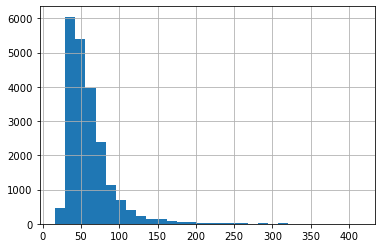

In [30]:
display(df_new['total_area'].describe())
df_new['total_area'].hist(bins=30)

Большинство квартир от 30 до 90 метров. Есть некоторое количество менее 30 и совсем единичные случаи по 150+ метров.

count    21372.000000
mean         2.739011
std          0.204428
min          2.400000
25%          2.600000
50%          2.771283
75%          2.771283
max          4.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

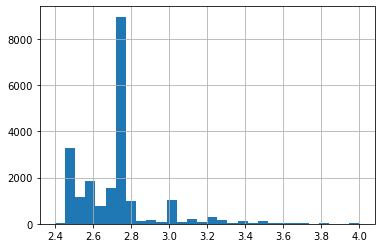

In [31]:
display(df_new['ceiling_height'].describe())
df_new['ceiling_height'].hist(bins=30)

С потолками все интереснее: хотя большинство квартир с потолками 2.6-2.8м, есть много квартир с потолками ниже. Т.к. я отсеил совсем нереально низкие потолки, мы их здесь не видим. Потолки ниже 2.6м тоже достаточно низкие - скорее всего это квартиры в старом жилом фонде, т.к. в Петербурге и области большое число старых домов еще с деревянными перекрытиями. Высокие потолки не в почете - их совсем немного, но они есть. Опять же, совсем нереально выскоие значения я отсек.

count    2.137200e+04
mean     6.306406e+06
std      7.753910e+06
min      1.219000e+04
25%      3.469800e+06
50%      4.650000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

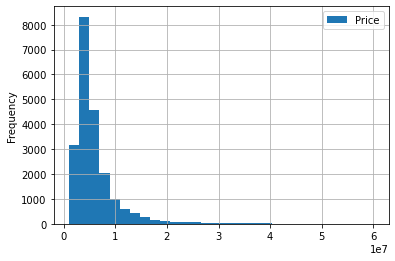

In [32]:
display(df_new['last_price'].describe())
df_new.plot(
    kind = 'hist',
    y = 'last_price',
    range = (1000000, 60000000),
    bins = 30,
    grid = True,
    label = 'Price'
)

Есть квартиры стоимостью более 300 млн. рублей. Хорошо в нее, видимо, вложились. Но все же большинство цен до 8 млн руб. и самый пик 4-5 млн.

count    21372.000000
mean         2.071215
std          1.052494
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

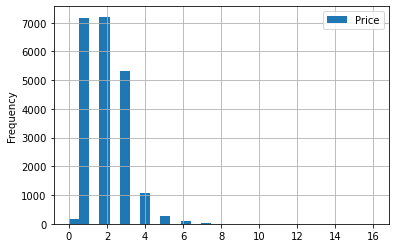

In [33]:
display(df_new['rooms'].describe())
df_new.plot(
    kind = 'hist',
    y = 'rooms',
    bins = 30,
    grid = True,
    label = 'Price'
)

Вот и нашел недоработку: есть квартиры с 0 комнат, что бы это ни значило. Сразу поправлю. Даже если это очень маленькая студия, то менее 1 комнаты быть не может.

count    21372.000000
mean         2.079403
std          1.040166
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

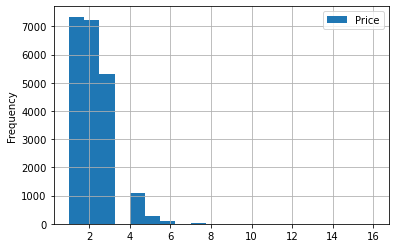

In [34]:
df_new.loc[df_new['rooms'] == 0, 'rooms'] = 1
df_new['rooms'].value_counts() # Проверка

display(df_new['rooms'].describe())
df_new.plot(
    kind = 'hist',
    y = 'rooms',
    bins = 20,
    grid = True,
    label = 'Price'
)

Вполне ожидаемо, что однушки и двушки самые популярные. Есть так же совсем дворцы по 16 комнат, хотя и 7 выглядит достаточно сказочно.

### Время продажи квартир
Интересно как долго продаются квартиры в Ленинградской области.

count    21372.000000
mean       159.482267
std        215.538880
min          0.000000
25%         21.000000
50%         77.000000
75%        204.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

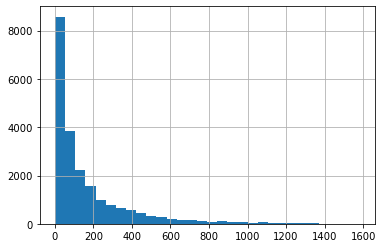

In [35]:
display(df_new['days_exposition'].describe())
df_new['days_exposition'].hist(bins=30)

Основная масса продаж (на самом деле снятия объявления по какой-то причине) укладывается в полгода. Посмотрю на полугодовой интервал поближе.

<AxesSubplot:ylabel='Frequency'>

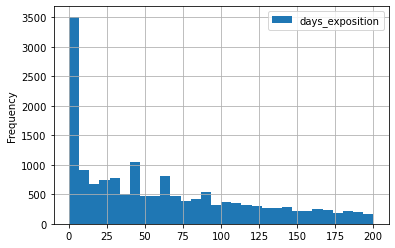

In [36]:
df_new.plot(
    kind = 'hist',
    y = 'days_exposition',
    range = (0, 200),
    bins = 30,
    grid = True
)

Интересный факт, что много квартир продаются необычно быстро - в день размещения или на следующий день. Далее ситуация достаточно равномерная и всплески к концу первого месяца размещения и второго. Далее по ниспадающей. Посмотрю поближе на всплески и что происходит с размещениями на интервале полгода - 2 года.

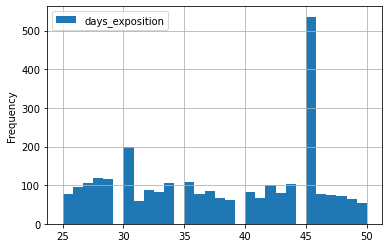

<AxesSubplot:ylabel='Frequency'>

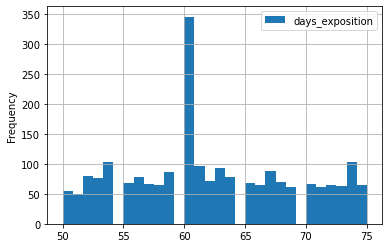

In [37]:
# Первый всплеск
df_new.plot(
    kind = 'hist',
    y = 'days_exposition',
    range = (25, 50),
    bins = 30,
    grid = True
)
plt.show()
# Второй всплеск
df_new.plot(
    kind = 'hist',
    y = 'days_exposition',
    range = (50, 75),
    bins = 30,
    grid = True
)

Вероятно, всплески связаны с атоматическим снятием объявлений. Буду считать эти значения выбивающимися, позднее удалю. 

694

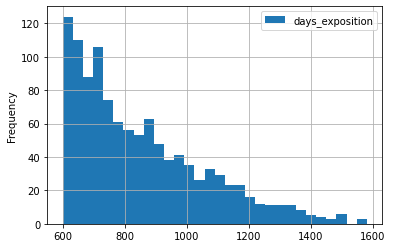

In [38]:
# После полугода размещения
df_new.plot(
    kind = 'hist',
    y = 'days_exposition',
    range = (600, 1580), # меняю первую границу для более детального изучения периода
    bins = 30,
    grid = True
)
display(df_new[df_new['days_exposition'] > 730]['days_exposition'].count())

694 объявления, провисевшие более 2-ух лет, 890 объявлений, странным образом закрытых на 45-й и 60-й дни. Итого, менее 7% данных. Жертвую ими для более объективной картины. 

In [39]:
df_new = df_new.query('days_exposition != 60')
df_new = df_new.query('days_exposition < 730')
df_new = df_new.query('days_exposition < 45 or days_exposition > 46')
df_new['days_exposition'].describe()

count    19796.000000
mean       136.042988
std        158.355877
min          0.000000
25%         18.000000
50%         79.000000
75%        192.000000
max        729.000000
Name: days_exposition, dtype: float64

Крайне много объявлений закрываются на 1-й и 2-й дни размещения - это дейстивтельно слишком быстро. Для автомобиля еще ок, но для квартиры... Крайне долгой продажей буду считать продажу (размещение объявления) более 2 лет.

### Что влияет на стоимость квартиры?
Сперва изучу зависимости цены от площади, числа комнат и удаленности от центра.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

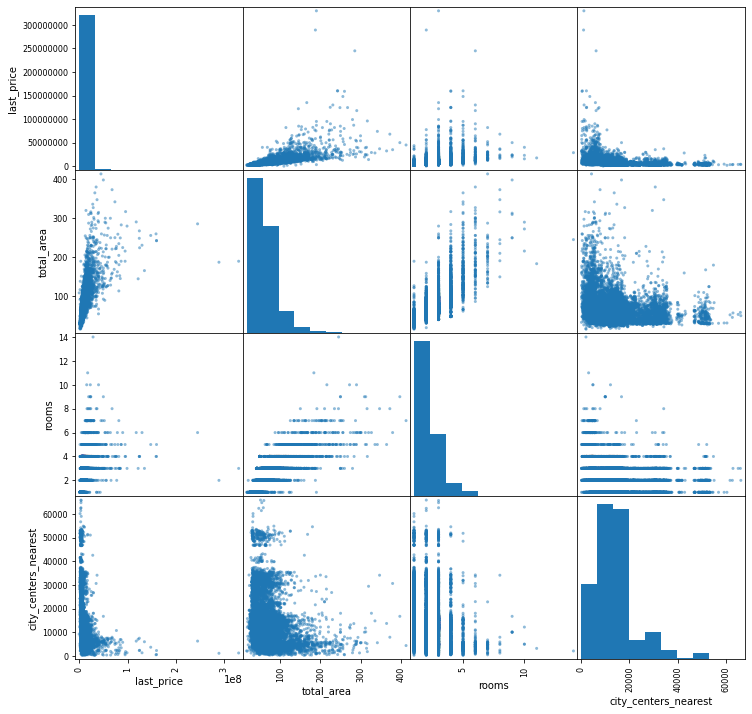

In [40]:
df_corr_clear = df_new.query('city_centers_nearest > 0') # Выберу только строки, где есть расстояние до центра
price_corr_matrix = df_corr_clear[['last_price', 'total_area', 'rooms', 'city_centers_nearest']] # Выберу интересующие столбцы
price_corr_matrix.corr()
pd.plotting.scatter_matrix(price_corr_matrix, figsize=(12,12))

Вижу более или менее прямую зависимость только от площади квартиры, что вполне закономерно, но тем не менее удивляет. А как же удорожание в зависимости от нахождения ближе к центру? По матрице видно, что скорее наоборот.   
Посмотрю как распределяется стоимость в зависимости от этажа.

In [41]:
display(df_new.pivot_table(columns = 'floors_group', values = 'last_price', aggfunc = 'median'))

floors_group,другой,первый,последний
last_price,4850000.0,3950000.0,4350000.0


Явно квартиры на первом этаже стоят значительно ниже. Последний тоже немного дешевле любого другого, но разница не такая серьезная.   
Есть ли зависимости от даты размещения?

<AxesSubplot:xlabel='year'>

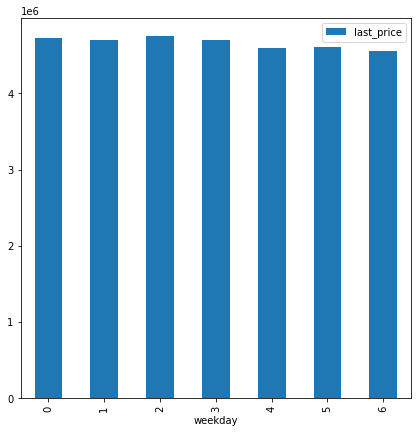

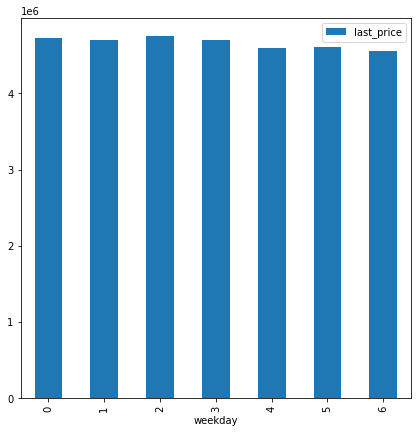

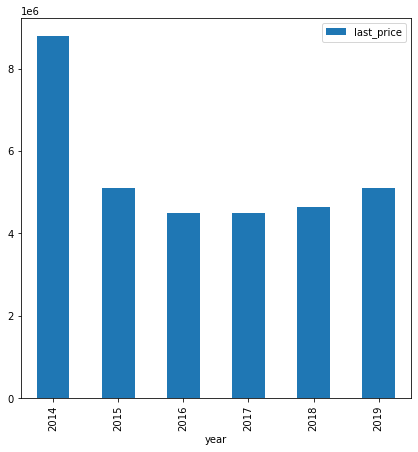

In [42]:
df_weekday_pivot = df_new.pivot_table(
    index = 'weekday',
    values = 'last_price',
    aggfunc = 'median'
)

df_weekday_pivot.plot(y='last_price', kind='bar', figsize=(7,7))

df_month_pivot = df_new.pivot_table(
    index = 'month',
    values = 'last_price',
    aggfunc = 'median'
)

df_weekday_pivot.plot(y='last_price', kind='bar', figsize=(7,7))

df_year_pivot = df_new.pivot_table(
    index = 'year',
    values = 'last_price',
    aggfunc = 'median'
)

df_year_pivot.plot(y='last_price', kind='bar', figsize=(7,7))

На графиках видно, что никакой явной зависимости от дня недели или месяца размещения объявления нет. Но стоимость квартир сильно упала в 2015г. и далее динамика не сильная.

### География продаж
Интересует топ 10 населенных пунктов по количеству объявлений.

,meter_price
locality_name,
Гатчина,68605.075379
Всеволожск,68927.604954
Колпино,75600.888974
Шушары,78269.901016
Петергоф,84214.422814
Мурино,86222.977702
Парголово,90338.302192
Кудрово,95817.270577
Пушкин,103359.874715


<AxesSubplot:xlabel='locality_name'>

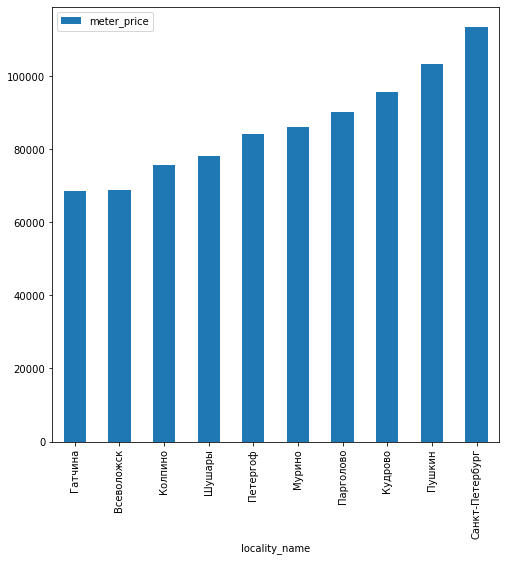

In [43]:
top_localities = df_new['locality_name'].value_counts().head(10) # Список топ населенных пунктов
df_tl = df_new.query('locality_name in @top_localities.index') # Датафрейм по топ населенным пунктам
df_tl_pivot = df_tl.pivot_table(index = 'locality_name', values = 'meter_price').sort_values(by='meter_price')
display(df_tl_pivot)
df_tl_pivot.plot(
    y = 'meter_price',
    kind = 'bar',
    figsize = (8, 8)
)

Самая высокая стоимость жилья, ожидаемо, в Санкт-Петербурге. Самая низкая же в Гатчине, хотя и Всеволжск совсем рядом.

### Квартиры в Санкт-Петербурге
Необходимо определить "центр" города. Д

/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2356955676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_flats.loc[:, 'center_km'] = spb_flats.loc[:, 'city_centers_nearest'] / 1000 # Столбец с расстоянием в км
/var/folders/5c/2q3z541d6f5fv13fbdytg1500000gn/T/ipykernel_5773/2356955676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_flats.loc[:, 'center_km'] = spb_flats.loc[:, 'center_km'].apply(math.ceil) # Округление


,meter_price
center_km,
1,183321.702117
2,158606.423188
3,143178.436748
4,123261.804195
5,133635.873268
6,141967.062819
7,149773.739615
8,140800.751745
9,118867.420525


<AxesSubplot:xlabel='center_km'>

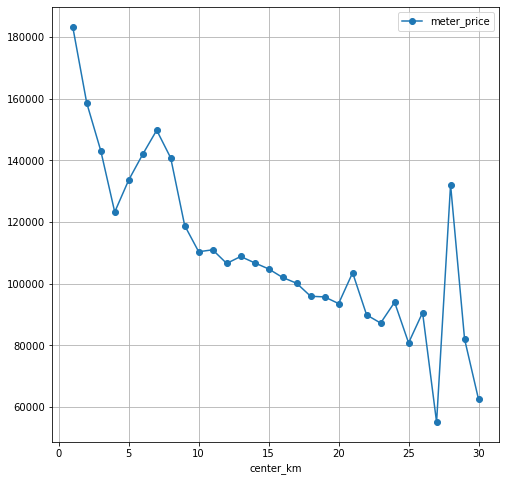

In [44]:
spb_flats = df_new.query('locality_name == "Санкт-Петербург" and city_centers_nearest > 0') # Выбираю квартиры в СПб с данными о расстоянии до центра
spb_flats.loc[:, 'center_km'] = spb_flats.loc[:, 'city_centers_nearest'] / 1000 # Столбец с расстоянием в км
spb_flats.loc[:, 'center_km'] = spb_flats.loc[:, 'center_km'].apply(math.ceil) # Округление
flats_pivot = spb_flats.pivot_table(index='center_km', values='meter_price')
display(flats_pivot)

flats_pivot.plot(
    y = 'meter_price',
    style = 'o-',
    figsize = (8, 8),
    grid = True,
)

Чем центрее, тем дороже. Хотя есть пик на уровне 7км, далее цена падает. Еще пик на 27км, тут видимо или крайне дорогой район или же элитная недвижимость.   
Обозначим центр как расстояние до 7км.

### Квартиры в центре Петербурга
Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

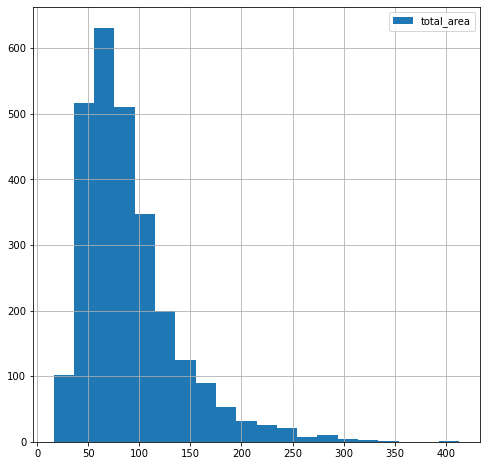

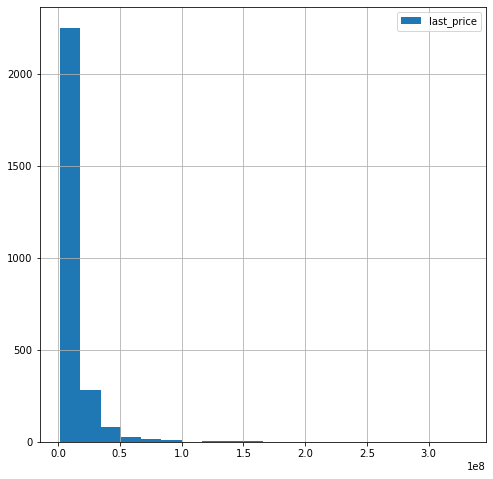

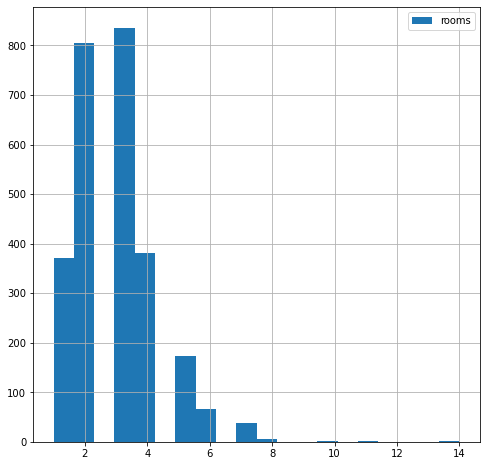

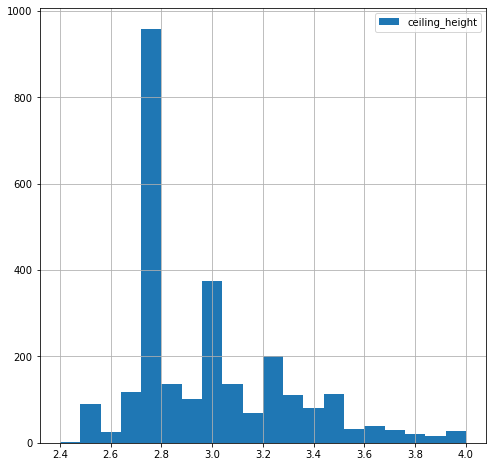

In [45]:
spb_center_flats = spb_flats.query('center_km <= 7') # Выбираю квартиры в центре города

# Строю гистограммы, чтобы изучить интересующие параметры
spb_center_flats['total_area'].hist(bins=20, figsize=(8,8), legend=True)
plt.show()
spb_center_flats['last_price'].hist(bins=20, figsize=(8,8), legend=True)
plt.show()
spb_center_flats['rooms'].hist(bins=20, figsize=(8,8), legend=True)
plt.show()
spb_center_flats['ceiling_height'].hist(bins=20, figsize=(8,8), legend=True)
plt.show()


Продажи в центре придерживаются следующих закономерностей:
- Подавляющее большинсто это двух- и трехкомнатные квартиры.
- Стоимость в большинстве - до 25 млн. руб.
- Самая популярная площадь в диапазоне от 30 до 90 метров.
- Высота потолков обычно стандартна - 2.7м-2.8м, еще достаточно популярна высота около 3м.

Построю диаграммы для изучения дополнительных параметров, которые могут влиять на стоимость квартиры.

,last_price,rooms,city_centers_nearest
last_price,1.000000,0.306517,-0.084690
rooms,0.306517,1.000000,-0.162739
city_centers_nearest,-0.084690,-0.162739,1.000000


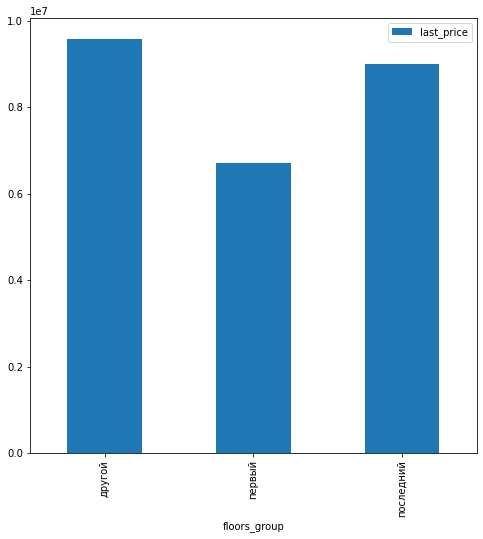

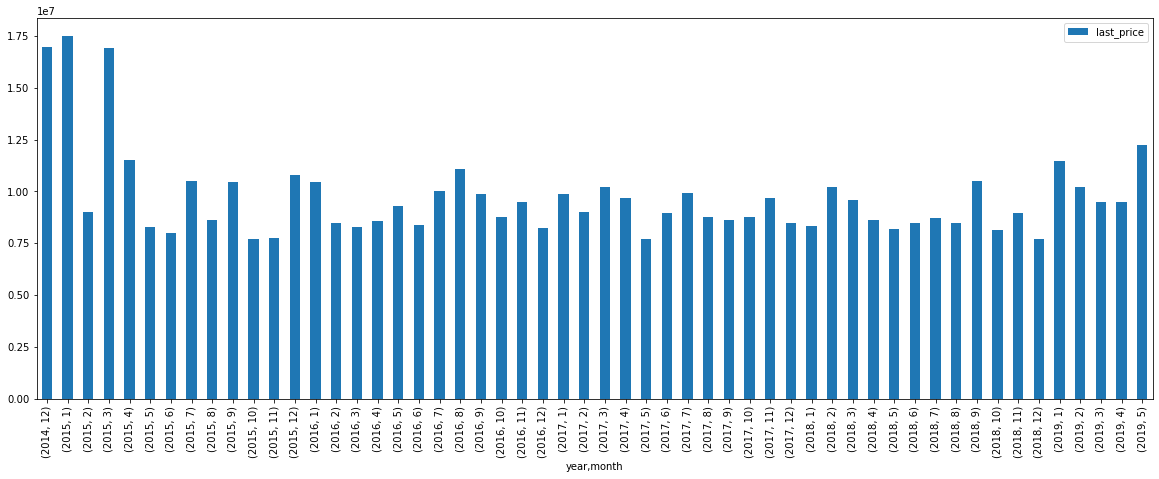

In [46]:
# Выбираю нужные столбцы
spb_center_flats_corr = spb_center_flats.loc[:, ['last_price', 'rooms', 'floors_group', 'city_centers_nearest', 'first_day_exposition']]
display(spb_center_flats_corr.corr()) # Матрица коэффициентов корреляции

fg_pivot = spb_center_flats.pivot_table(
    index = 'floors_group',
    values = 'last_price',
    aggfunc = 'median'
)
fg_pivot.plot(kind='bar', y='last_price', figsize = (8,8))
plt.show()

date_pivot = spb_center_flats.pivot_table(
    index = ('year', 'month'),
    values = 'last_price',
    aggfunc = 'median'
)
date_pivot.plot(y = 'last_price', kind = 'bar', figsize = (20,7))
plt.show()

В центре города стоимость квартир на первом этаже так же ниже, а вот последний уже не так сильно влияет на стоимость. Интересны цены в зависимости от удаленности от центра - цена немного поодаль от центра немного дороже, думаю это как раз связано с количеством людей, транспорта и шума от них. А вот слегка поодаль жить, конечно, лучше, т.к. не теряется транспортная доступность и развитая инфраструктура, но вероятность выйти из подъезда и сбить туриста - ниже.   
По дате размещения явных зависимостей нет. 

## Общий вывод

### Что было сделано
***1. Заполнил пропуски в данных:***    
    1.1. Балконы. Пропуски заполнил 0 по логике - если пользователь не указал кол-во балконов, значит их просто нет.   
    1.2. Кухни. Пропуски заполнил средними значениями, в зависимости от размера квартиры. Чтобы в маленьких квартирах не получилось больших кухонь и наоборот.   
    1.3. Срок объявления. Тут пропуски также заполнил 0, предположив, что отсутствие значения означает срок хренения менее дня.   
    
***2. Изменил тип данных.***   
Например, в столбце с кол-вом балконов или этажности здания на целочисленный, потому что не бывает 2.5 этажа или полбалкона. И в столбце с датой размещения объявления на ```datetime```, чтобы удобнее работать.   

***3. Избавился от редких и выбивающихся значений.***   
Например, от слишком крохотных кухонь или потолков высотой 1м. Также ушли данные по крайне дорогим и элитным квартирам с огромным числом комнат.

***4. Добавил расчетные данные.***   
    4.1. Цена квадратного метра.   
    4.2. День недели, месяц и год публикации объявления.   
    4.3. Этаж квартиры (первый, последний или другой).   
    4.4. Соотношение жилой и общей площади.

### Выводы
- Самое явное влияние на стоимость квартиры имеет площадь.
- Цены на жилье в Санкт-Петербурге сильно выше, чем по области.
- Расстояние до центра города влияет на стоимость, но не сильно. При этом цены на квартиры в центральной зоне города еще слабее зависит от расстояния до центра.
- Самые популярные квартиры - 1х и 2х комнатные.
- Средняя стоимость не превышает 10 млн. рублей.
- Большинство квартир продаются в течение полугода.
- Квартиры на первом этаже стоят дешевле.

### Дополнительно
Крайне не хватает данных по апартаментам - уверен, это сильно бы изменило картину, т.к. из-за правил регистрации и владения такой собственностью и стоимость на нее значительно меньше как правило.
Дополнительно интересно посмотреть на качество ремонта в квартирах или хотя бы бинарно с отделкой или без, т.е. понять сколько продают обжитых квартир. Тут тоже бы картина, имхо, разительно отличалась.